# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [5]:
data=pd.DataFrame(boston['data'], columns=[boston['feature_names']])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [6]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

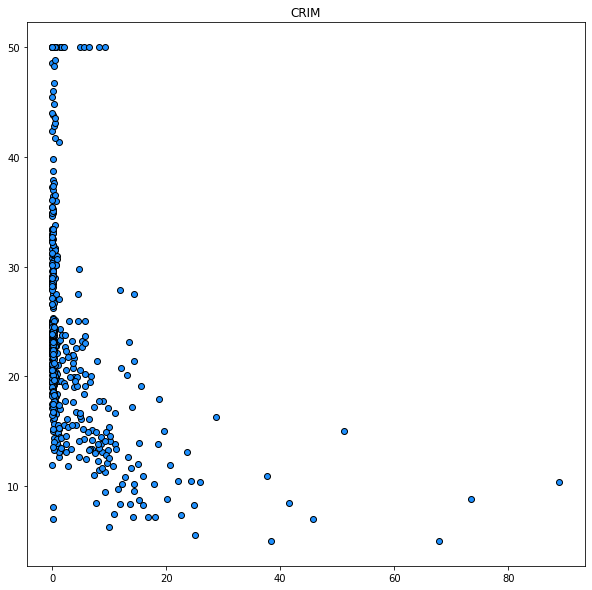

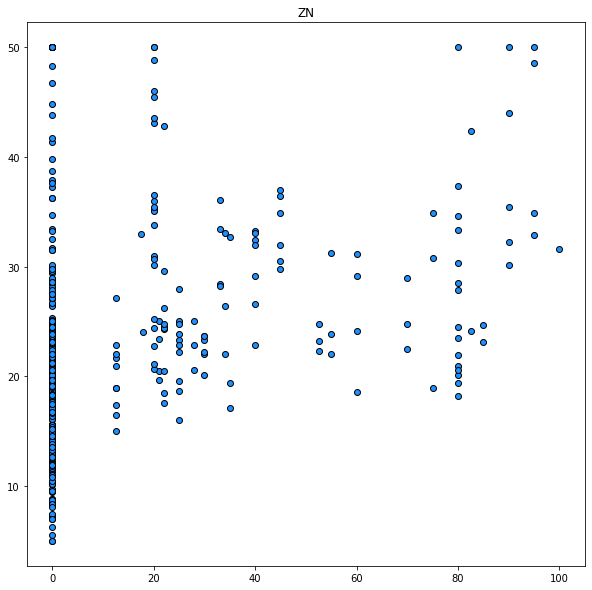

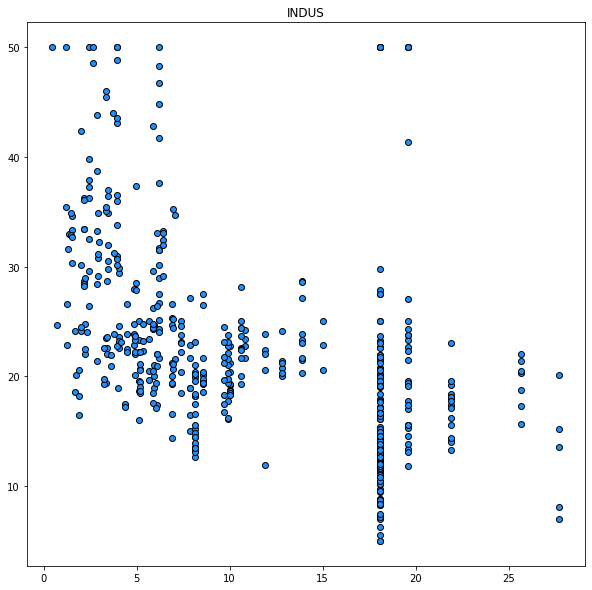

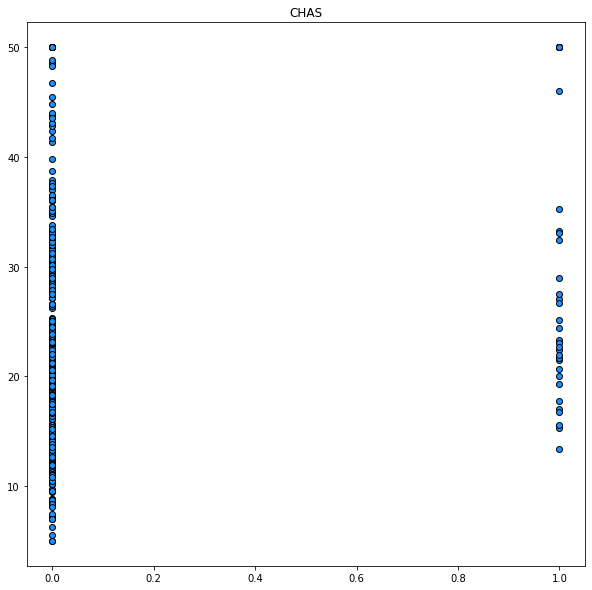

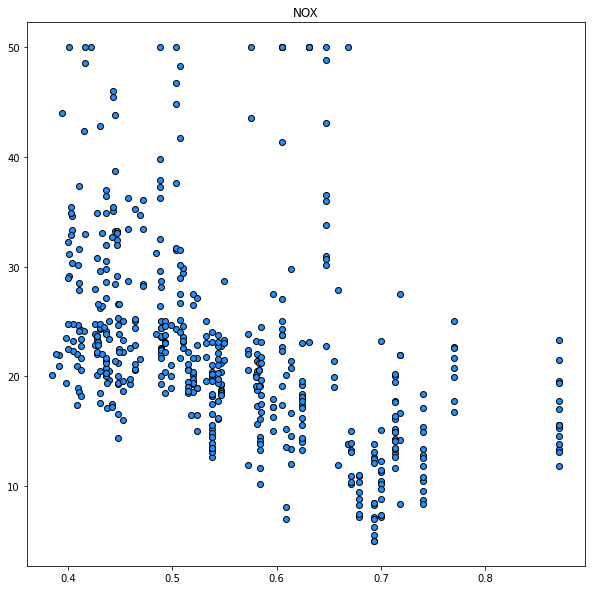

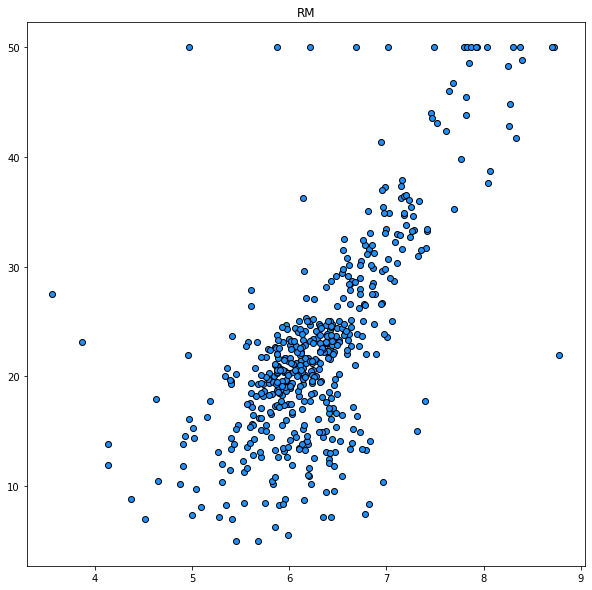

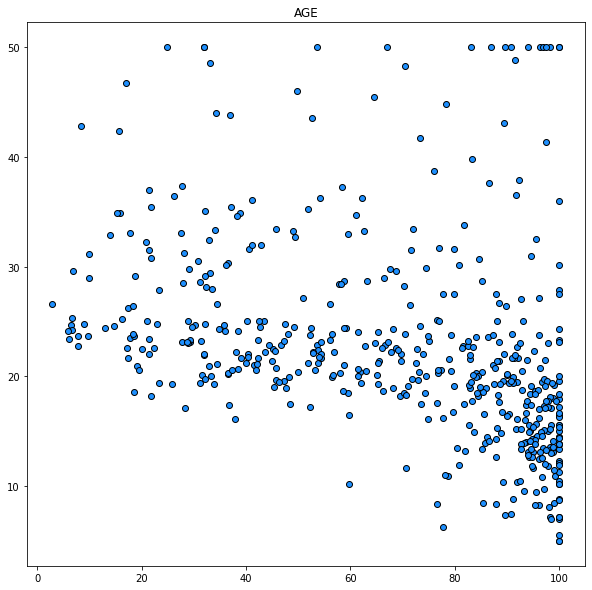

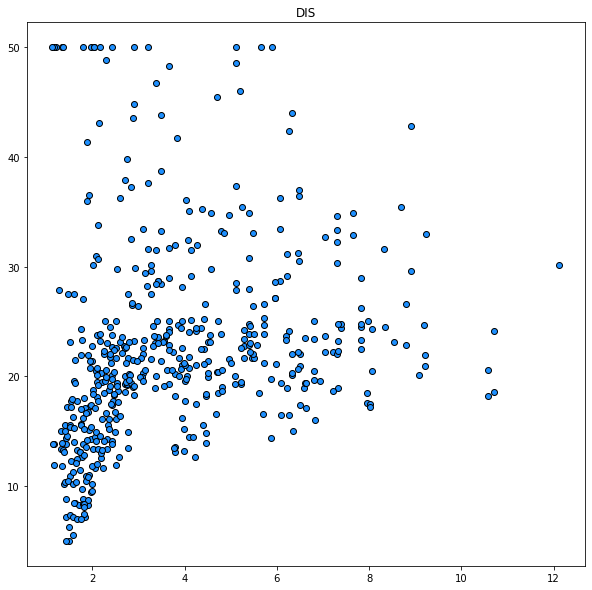

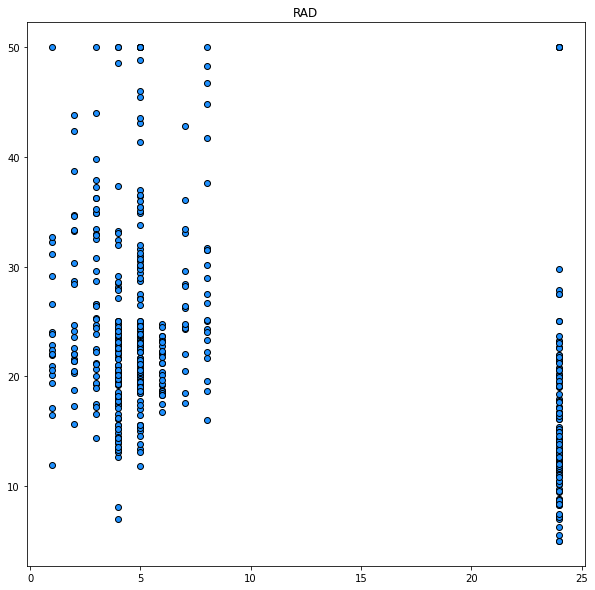

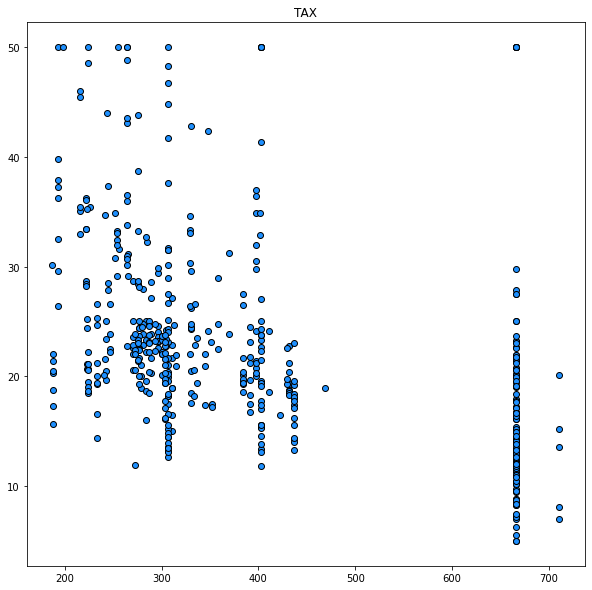

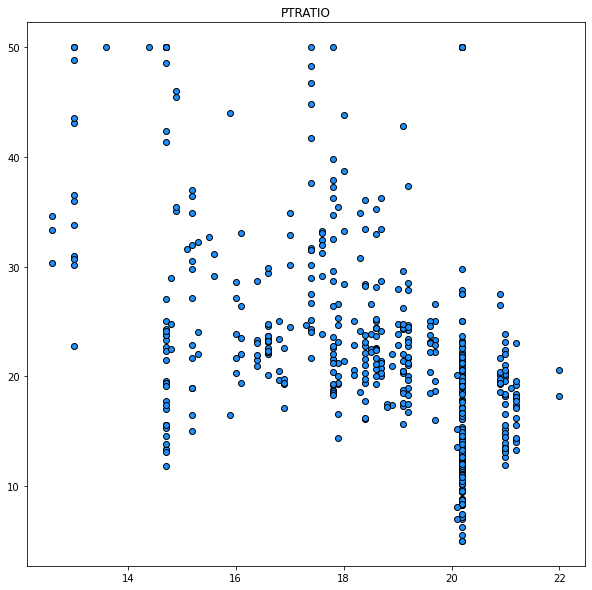

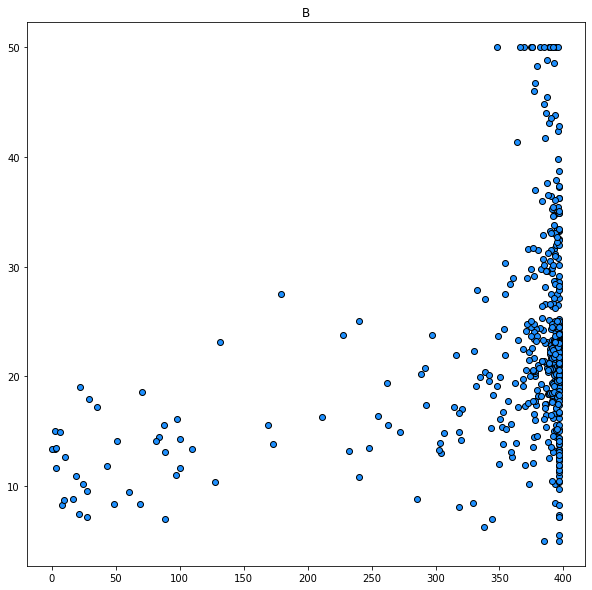

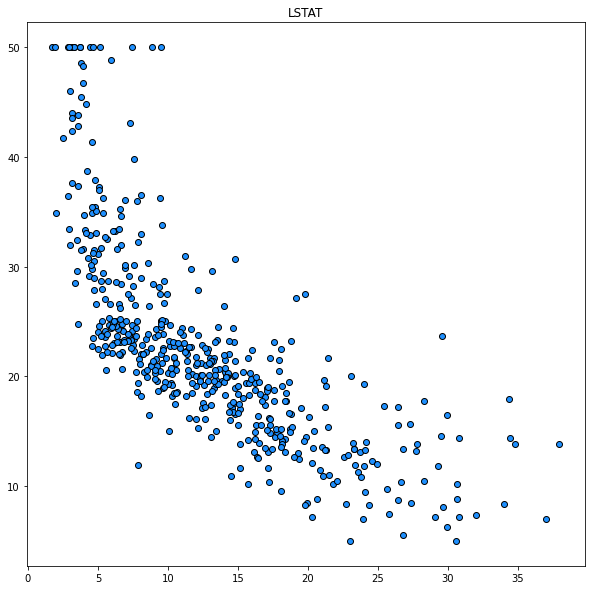

In [7]:
cant_graph=len(boston['feature_names'])
for i in range(0, cant_graph):
    plt.figure(figsize=(10,10))
    feature = boston['feature_names'][i]
    selector = (boston['feature_names'] == feature)
    plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.title(feature)
plt.show()

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [8]:
# 1. Resolver acá. Ayuda:
feature = 'LSTAT'  
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [9]:
# 2. Instanciar y entrenar acá.

from sklearn.linear_model import LinearRegression
linear_regressor=LinearRegression()
linear_regressor.fit(X_train_f,y_train)


LinearRegression()

In [10]:
# 3. Predecir y evaluar acá.
from sklearn import metrics
predictions=linear_regressor.predict(X_test_f)
mean_square_error=metrics.mean_squared_error(predictions, y_test)
mean_square_error

46.336305360025925

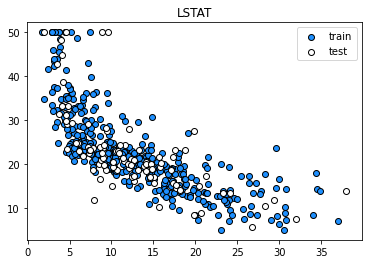

In [11]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [28]:
# 1. Resolver acá.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def train_and_predict(degree,X_train,X_test,y_train,y_test):
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    return metrics.mean_squared_error(y_test, y_test_pred), model


In [29]:
degrees=25
error_results= [train_and_predict(i,X_train_f,X_test_f,y_train,y_test)[0] for i in range (1,degrees)]
error_results

[46.336305360025946,
 38.8468686617073,
 37.22424226844034,
 34.70486859830847,
 34.83470819928622,
 34.3262065720932,
 34.261115151135115,
 36.41526541037021,
 34.87469430454277,
 62.88874919934792,
 514.9723397976045,
 4272.209656424971,
 11604.356986642051,
 7781.833967158303,
 13240.419392009107,
 18100.09289543675,
 22412.30261752701,
 29917.932631021722,
 46955.938822539276,
 85265.18678059946,
 151722.10418802063,
 42820.464411337045,
 56249.444514861374,
 80231.67698021517]

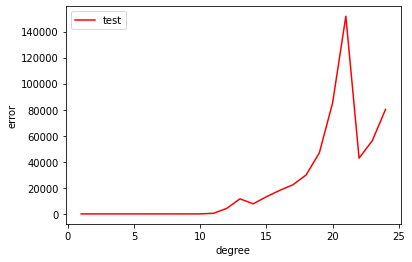

In [30]:
# 2. Graficar curvas de error acá.
degrees_list=[i for i in range(1,degrees)]
plt.plot(degrees_list, error_results, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [15]:
# 4. Reconstruir mejor modelo acá y graficar.

In [16]:
opt_degree=error_results.index(min(error_results))

In [17]:
rmse,model=train_and_predict(opt_degree,X_train_f,X_test_f,y_train,y_test)
rmse

34.3262065720932

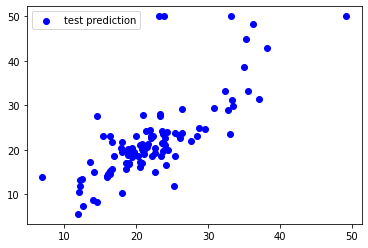

In [18]:
plt.scatter(model.predict(X_test_f), y_test, color="blue", label="test prediction")
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [19]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LTSAT')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 1), (102, 1))

In [20]:
x_fs=data[['RM', 'LSTAT']]
X_train_fs,X_test_fs,y_train_fs,y_test_fs=train_test_split(x_fs, y, train_size=0.8, random_state=0)

In [21]:
degrees=25
error_results= [train_and_predict(i,X_train_fs,X_test_fs,y_train_fs,y_test_fs)[0] for i in range (1,degrees)]
error_results

[37.383105638779945,
 28.144971863123704,
 28.56716643527473,
 33.99923337103693,
 34.201411390932755,
 34.92382507162666,
 70.28116011845859,
 546.4299157544074,
 1104.4877122116038,
 1754.920481408813,
 119217.72553794445,
 92294.0444605542,
 14755298.385693567,
 513495.47242728324,
 5096.141919634601,
 38932990.6025542,
 516033.3616195703,
 1659514222.4641826,
 1765890795.707043,
 12388643864.799067,
 1357053650.5773335,
 65116119227.15205,
 69330320009.54257,
 883613921486.7194]

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [22]:
#Ejercicio 6


In [23]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [24]:
degrees=10
error_results= [train_and_predict(i,X_train,X_test,y_train,y_test)[0] for i in range (1,degrees)]
error_results

[33.448979997676645,
 31.27781497075713,
 976575.8771388022,
 950756.9075611321,
 195453.6390365556,
 200691.24234269088,
 24919.630059351628,
 142027.86249336068,
 469490.9844347301]

In [33]:
from sklearn.linear_model import Ridge
alpha_coef=[0.0001,0.01, 0.1, 0.5,1, 5, 10, 50, 100]
for alpha in alpha_coef:
    clf=Ridge(alpha=alpha)
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    print(metrics.mean_squared_error(y_test, predictions))

33.449080221931546
33.45900094169788
33.54848836591606
33.902745172431665
34.231606110615395
35.178583234832594
35.52513234300501
36.608774159765574
37.51239731373681
